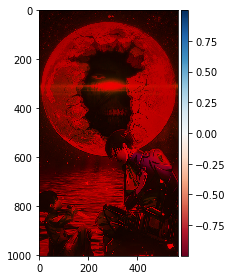

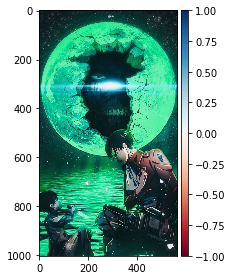

In [11]:
# convertir RGB a YUV

#usando librerias

from skimage import io
from skimage import color
from skimage import data
from pylab import *

imagen= "shingeki.jpg"
img = io.imread(imagen)

img_yuv = color.rgb2yuv(img)

#convertir de YUV a RGB

img_rgb = color.yuv2rgb(img_yuv)

figure(0)
io.imshow(img_yuv)

figure(1)
io.imshow(img_rgb)





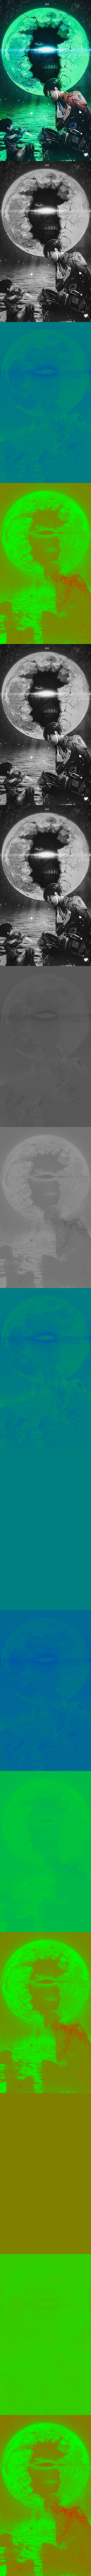

In [41]:
#Usando funcion 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]],dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]],dtype=np.uint8)

imagen = "shingeki.jpg"
img = cv2.imread(imagen)

img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y, u, v = cv2.split(img_yuv)

lut_u, lut_v = make_lut_u(), make_lut_v()

# Convert back to BGR so we can apply the LUT and stack the images
y = cv2.cvtColor(y, cv2.COLOR_GRAY2BGR)
u = cv2.cvtColor(u, cv2.COLOR_GRAY2BGR)
v = cv2.cvtColor(v, cv2.COLOR_GRAY2BGR)

u_mapped = cv2.LUT(u, lut_u)
v_mapped = cv2.LUT(v, lut_v)

result = np.vstack([img, y, u_mapped, v_mapped])

cv2.imwrite('shing1.jpg', result)
img_result= cv2.imread("shing1.jpg")
cv2_imshow(img_result)